[]

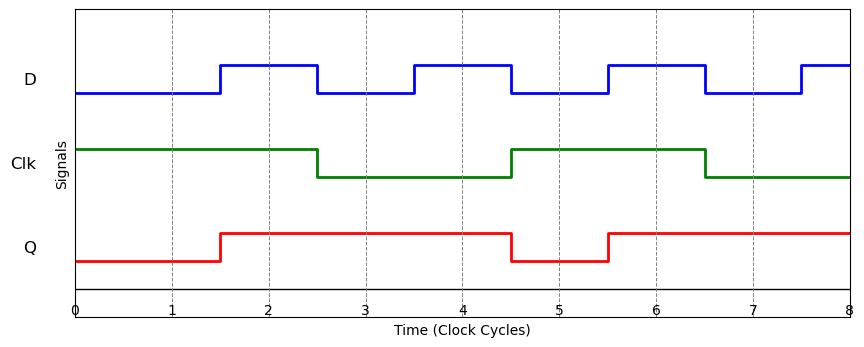

In [2]:
import matplotlib.pyplot as plt

# Define the signals (1 = HIGH, 0 = LOW)
clk = [1,1,0,0,1,1,0,0]
d   = [0,1,0,1,0,1,0,1]
q   = [0,1,1,1,0,1,1,1]

# Extend signals for proper step plotting
def extend(sig):
    return [sig[0]] + [val for val in sig for _ in (0,1)]

clk_ext = extend(clk)
d_ext   = extend(d)
q_ext   = extend(q)
time_ext = list(range(len(clk_ext)))

# Plot
fig, ax = plt.subplots(figsize=(10,4))

def draw_wave(signal, ypos, label, color="black"):
    ax.step(time_ext, [y+ypos for y in signal], where="post", linewidth=2, color=color)
    ax.text(-0.8, ypos+0.5, label, fontsize=12, ha="right", va="center")

# Draw signals with spacing
draw_wave(d_ext, 6, "D", "blue")
draw_wave(clk_ext, 3, "Clk", "green")
draw_wave(q_ext, 0, "Q", "red")

# Axis lines and formatting
ax.axhline(-1, color="black", linewidth=1)   # x-axis line
for i in range(len(clk)+1):
    ax.axvline(i*2, color="gray", linestyle="--", linewidth=0.7)  # cycle boundaries
    ax.text(i*2, -1.5, str(i), ha="center", va="top", fontsize=10)

ax.set_ylim(-2, 9)
ax.set_xlim(0, len(time_ext)-1)
ax.set_xlabel("Time (Clock Cycles)")
ax.set_ylabel("Signals")
ax.set_yticks([])   # Hide y ticks
ax.set_xticks([])   # Hide x ticks (we use labels ins_


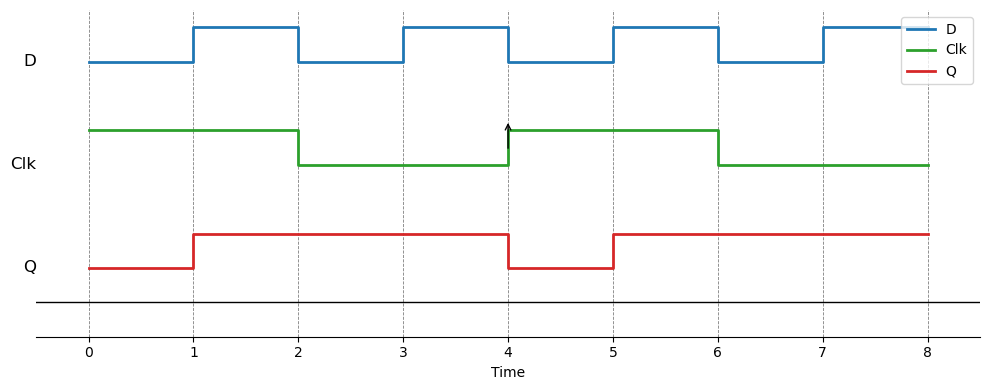

In [5]:
import matplotlib.pyplot as plt

# --- input signals (1 = HIGH, 0 = LOW) ---
clk = [1,1,0,0,1,1,0,0]
d   = [0,1,0,1,0,1,0,1]
q   = [0,1,1,1,0,1,1,1]

# number of time steps (one step per input bit)
N = len(clk)

# Build step plot data: for each sample i produce a horizontal segment from i to i+1 at level signal[i]
def make_step_xy(signal):
    x = []
    y = []
    for i, val in enumerate(signal):
        x.extend([i, i+1])   # from time i to i+1
        y.extend([val, val]) # constant over that interval
    return x, y

# create x,y for each signal
xd, yd = make_step_xy(d)
xclk, yclk = make_step_xy(clk)
xq, yq = make_step_xy(q)

# vertical offsets for visual separation
offset_d = 6
offset_clk = 3
offset_q = 0

# plotting
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(xd, [v+offset_d for v in yd], drawstyle='steps-post', linewidth=2, label='D', color='tab:blue')
ax.plot(xclk, [v+offset_clk for v in yclk], drawstyle='steps-post', linewidth=2, label='Clk', color='tab:green')
ax.plot(xq, [v+offset_q for v in yq], drawstyle='steps-post', linewidth=2, label='Q', color='tab:red')

# draw horizontal baseline for reference
ax.axhline(-1, color='black', linewidth=1)

# vertical dashed lines at integer boundaries 0..N
for t in range(N+1):
    ax.axvline(t, color='gray', linestyle='--', linewidth=0.6, zorder=0)

# x ticks exactly at integer boundaries and labeled 0..N
ax.set_xticks(range(N+1))
ax.set_xticklabels([str(i) for i in range(N+1)])
ax.set_xlabel("Time")

# y labels: place signal names on the left
ax.text(-0.5, offset_d + 0.0, "D", fontsize=12, ha="right", va="center")
ax.text(-0.5, offset_clk + 0.0, "Clk", fontsize=12, ha="right", va="center")
ax.text(-0.5, offset_q + 0.0, "Q", fontsize=12, ha="right", va="center")

# Hide default y-axis
ax.set_yticks([])

# Set axis limits so waveforms and text fit nicely
ax.set_xlim(-0.5, N + 0.5)
ax.set_ylim(-2, offset_d + 1.5)

# Optionally mark rising edges of clock with upward arrows where clk goes 0 -> 1
for i in range(N-1):
    if clk[i] == 0 and clk[i+1] == 1:
        # rising edge at boundary i+1
        tx = i + 1
        ty = offset_clk + 1.0
        ax.annotate('', xy=(tx, ty+0.3), xytext=(tx, ty-0.6),
                    arrowprops=dict(arrowstyle="->", color='black'))

# cosmetic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# legend (optional)
ax.legend(loc='upper right')

# save and show
plt.tight_layout()
plt.savefig("Figure 2.png", dpi=300)
plt.show()


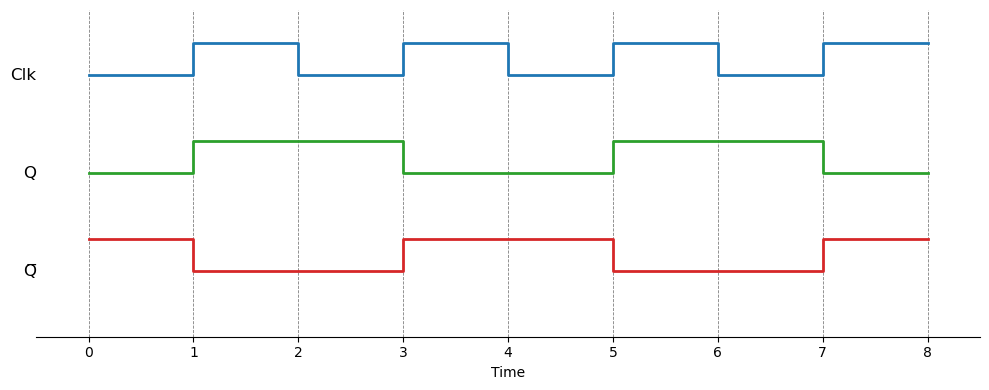

In [10]:
import matplotlib.pyplot as plt

# --- input signals ---
C  = [0,1,0,1,0,1,0,1]
Q  = [0,1,1,0,0,1,1,0]
Qb = [1 - v for v in Q]   # Qbar = NOT Q

N = len(C)

def make_step_xy(signal):
    """Build step x,y points for a waveform"""
    x, y = [], []
    for i, val in enumerate(signal):
        x.extend([i, i+1])   # segment from i to i+1
        y.extend([val, val])
    return x, y

# make step xy
xC, yC = make_step_xy(C)
xQ, yQ = make_step_xy(Q)
xQb, yQb = make_step_xy(Qb)

# vertical offsets to separate waveforms
offC, offQ, offQb = 6, 3, 0

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(xC, [v+offC for v in yC], drawstyle='steps-post', linewidth=2, color='tab:blue', label="Clk")
ax.plot(xQ, [v+offQ for v in yQ], drawstyle='steps-post', linewidth=2, color='tab:green', label="Q")
ax.plot(xQb, [v+offQb for v in yQb], drawstyle='steps-post', linewidth=2, color='tab:red', label="Q̅")

# grid lines at integer times
for t in range(N+1):
    ax.axvline(t, color='gray', linestyle='--', linewidth=0.6, zorder=0)

# x-axis setup
ax.set_xticks(range(N+1))
ax.set_xlabel("Time")

# y labels
ax.text(-0.5, offC,  "Clk",  fontsize=12, ha="right", va="center")
ax.text(-0.5, offQ,  "Q",  fontsize=12, ha="right", va="center")
ax.text(-0.5, offQb, "Q̅", fontsize=12, ha="right", va="center")

ax.set_yticks([])  # hide y ticks
ax.set_xlim(-0.5, N+0.5)
ax.set_ylim(-2, offC+2)

# cosmetic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Figure 3.png", dpi=300)
plt.show()


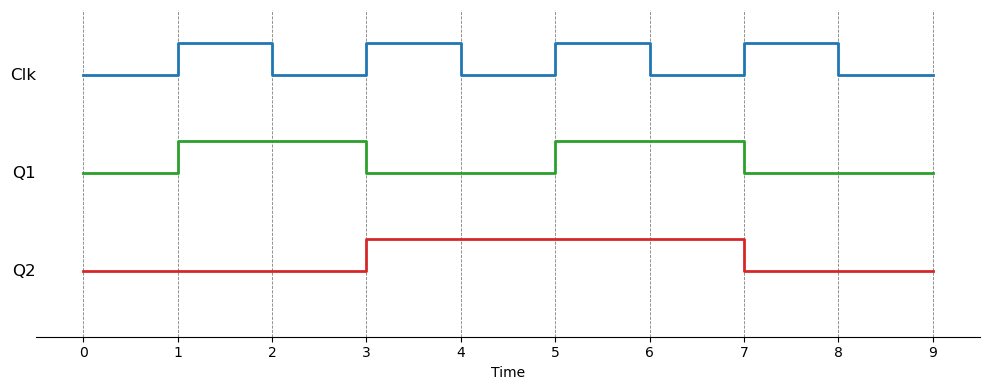

In [14]:
import matplotlib.pyplot as plt

# --- input signals ---
clk = [0,1,0,1,0,1,0,1,0]
Q1  = [0,1,1,0,0,1,1,0,0]
Q2  = [0,0,0,1,1,1,1,0,0]

N = len(clk)

def make_step_xy(signal):
    """Build step x,y points for a waveform"""
    x, y = [], []
    for i, val in enumerate(signal):
        x.extend([i, i+1])   # segment from i to i+1
        y.extend([val, val])
    return x, y

# make step xy
xclk, yclk = make_step_xy(clk)
xQ1, yQ1   = make_step_xy(Q1)
xQ2, yQ2   = make_step_xy(Q2)

# vertical offsets for clarity
off_clk, off_Q1, off_Q2 = 6, 3, 0

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(xclk, [v+off_clk for v in yclk], drawstyle='steps-post',
        linewidth=2, color='tab:blue', label="clk")
ax.plot(xQ1, [v+off_Q1 for v in yQ1], drawstyle='steps-post',
        linewidth=2, color='tab:green', label="Q1")
ax.plot(xQ2, [v+off_Q2 for v in yQ2], drawstyle='steps-post',
        linewidth=2, color='tab:red', label="Q2")

# grid lines at integer times
for t in range(N+1):
    ax.axvline(t, color='gray', linestyle='--', linewidth=0.6, zorder=0)

# x-axis setup
ax.set_xticks(range(N+1))
ax.set_xlabel("Time")

# labels on left
ax.text(-0.5, off_clk, "Clk", fontsize=12, ha="right", va="center")
ax.text(-0.5, off_Q1,  "Q1",  fontsize=12, ha="right", va="center")
ax.text(-0.5, off_Q2,  "Q2",  fontsize=12, ha="right", va="center")

ax.set_yticks([])  # hide y ticks
ax.set_xlim(-0.5, N+0.5)
ax.set_ylim(-2, off_clk+2)

# cosmetic cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Figure 4.png", dpi=300)
plt.show()


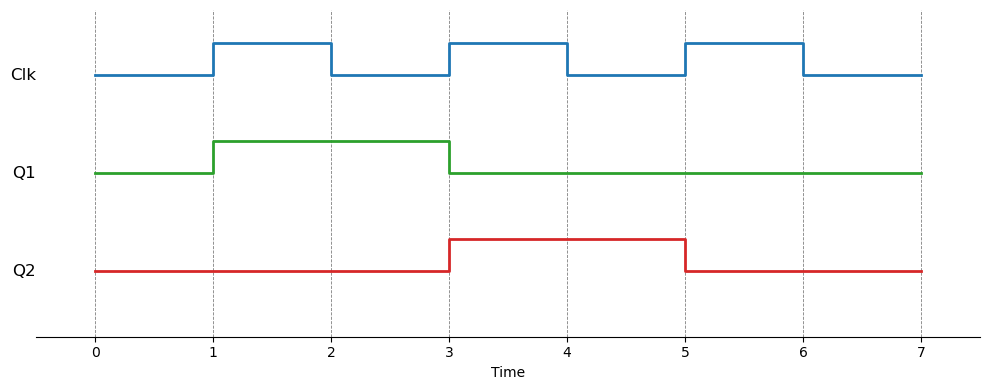

In [5]:
import matplotlib.pyplot as plt

# --- input signals ---
clk = [0,1,0,1,0,1,0]
Q1  = [0,1,1,0,0,0,0]
Q2  = [0,0,0,1,1,0,0]

N = len(clk)

def make_step_xy(signal):
    """Build step x,y points for waveform plotting"""
    x, y = [], []
    for i, val in enumerate(signal):
        x.extend([i, i+1])
        y.extend([val, val])
    return x, y

# build step signals
xclk, yclk = make_step_xy(clk)
xQ1, yQ1   = make_step_xy(Q1)
xQ2, yQ2   = make_step_xy(Q2)

# vertical offsets so waveforms don’t overlap
off_clk, off_Q1, off_Q2 = 6, 3, 0

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(xclk, [v+off_clk for v in yclk], drawstyle='steps-post',
        linewidth=2, color='tab:blue', label="clk")
ax.plot(xQ1, [v+off_Q1 for v in yQ1], drawstyle='steps-post',
        linewidth=2, color='tab:green', label="Q1")
ax.plot(xQ2, [v+off_Q2 for v in yQ2], drawstyle='steps-post',
        linewidth=2, color='tab:red', label="Q2")

# vertical guides
for t in range(N+1):
    ax.axvline(t, color='gray', linestyle='--', linewidth=0.6, zorder=0)

# time axis
ax.set_xticks(range(N+1))
ax.set_xlabel("Time")

# labels
ax.text(-0.5, off_clk, "Clk", fontsize=12, ha="right", va="center")
ax.text(-0.5, off_Q1,  "Q1",  fontsize=12, ha="right", va="center")
ax.text(-0.5, off_Q2,  "Q2",  fontsize=12, ha="right", va="center")

# clean y-axis
ax.set_yticks([])
ax.set_xlim(-0.5, N+0.5)
ax.set_ylim(-2, off_clk+2)

# remove top/right/left borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Figure 5.png", dpi=300)
plt.show()


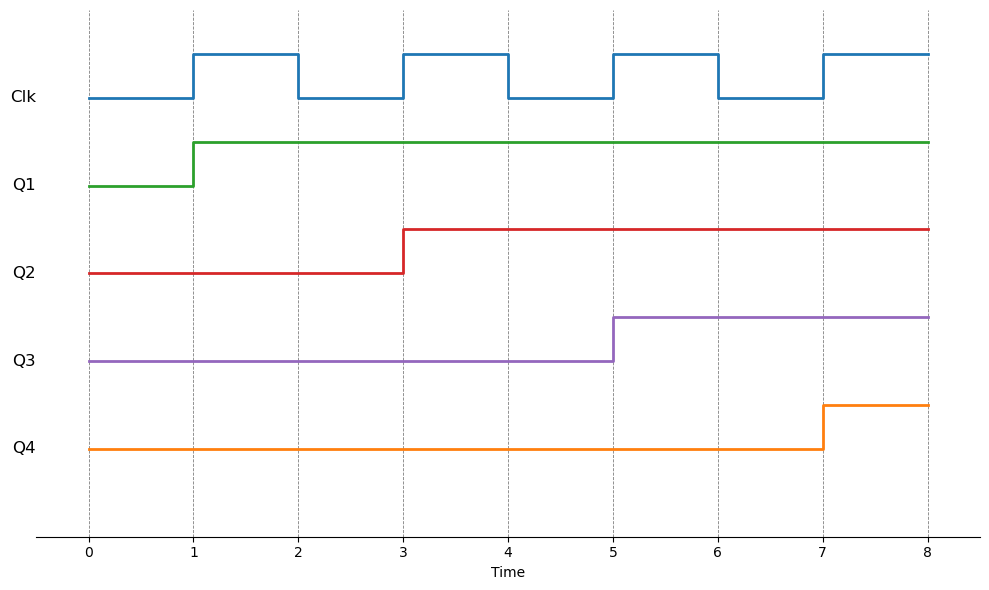

In [12]:
import matplotlib.pyplot as plt

# --- input signals ---
clk = [0,1,0,1,0,1,0,1]
Q1  = [0,1,1,1,1,1,1,1]
Q2  = [0,0,0,1,1,1,1,1]
Q3  = [0,0,0,0,0,1,1,1]
Q4  = [0,0,0,0,0,0,0,1]

signals = {"Clk": clk, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Q4": Q4}

def make_step_xy(signal):
    """Build step x,y points for waveform plotting"""
    x, y = [], []
    for i, val in enumerate(signal):
        x.extend([i, i+1])
        y.extend([val, val])
    return x, y

fig, ax = plt.subplots(figsize=(10,6))

offset = len(signals)*2
spacing = 2
colors = ["tab:blue","tab:green","tab:red","tab:purple","tab:orange"]

for i, (label, sig) in enumerate(signals.items()):
    x, y = make_step_xy(sig)
    y_off = offset - i*spacing
    ax.plot(x, [yy+y_off for yy in y], drawstyle="steps-post",
            linewidth=2, color=colors[i%len(colors)])
    ax.text(-0.5, y_off, label, fontsize=12, ha="right", va="center")

# vertical guides
N = len(clk)
for t in range(N+1):
    ax.axvline(t, color='gray', linestyle='--', linewidth=0.6, zorder=0)

# axis settings
ax.set_xticks(range(N+1))
ax.set_xlabel("Time")
ax.set_yticks([])
ax.set_xlim(-0.5, N+0.5)
ax.set_ylim(0, offset+2)

# remove unnecessary borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Figure 6a.png", dpi=300)
plt.show()


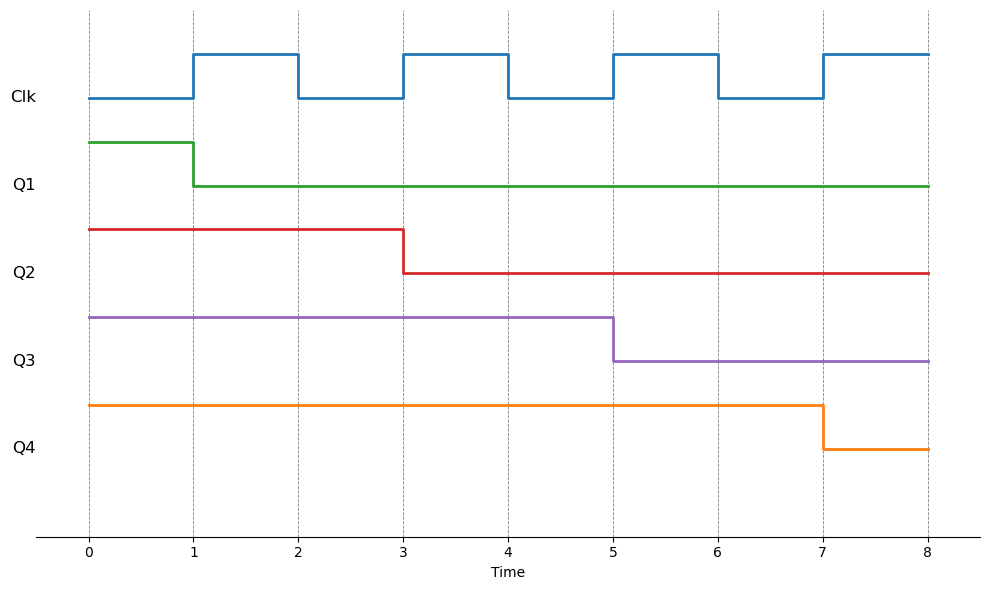

In [13]:
import matplotlib.pyplot as plt

# --- input signals (turning off case) ---
clk = [0,1,0,1,0,1,0,1]
Q1  = [1,0,0,0,0,0,0,0]
Q2  = [1,1,1,0,0,0,0,0]
Q3  = [1,1,1,1,1,0,0,0]
Q4  = [1,1,1,1,1,1,1,0]

signals = {"Clk": clk, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Q4": Q4}

def make_step_xy(signal):
    x, y = [], []
    for i, val in enumerate(signal):
        x.extend([i, i+1])
        y.extend([val, val])
    return x, y

fig, ax = plt.subplots(figsize=(10,6))

offset = len(signals)*2
spacing = 2
colors = ["tab:blue","tab:green","tab:red","tab:purple","tab:orange"]

for i, (label, sig) in enumerate(signals.items()):
    x, y = make_step_xy(sig)
    y_off = offset - i*spacing
    ax.plot(x, [yy+y_off for yy in y], drawstyle="steps-post",
            linewidth=2, color=colors[i%len(colors)])
    ax.text(-0.5, y_off, label, fontsize=12, ha="right", va="center")

# vertical guides
N = len(clk)
for t in range(N+1):
    ax.axvline(t, color='gray', linestyle='--', linewidth=0.6, zorder=0)

# axis settings
ax.set_xticks(range(N+1))
ax.set_xlabel("Time")
ax.set_yticks([])
ax.set_xlim(-0.5, N+0.5)
ax.set_ylim(0, offset+2)

# remove unnecessary borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Figure 6b.png", dpi=300)
plt.show()
